In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, '/home/ptr@itd.local/code/fairness_triangle/tools') # so i can import tools
from  gen_synth_data import *
from plot_helper import *


Font size: 15.0
Font size: 15.0


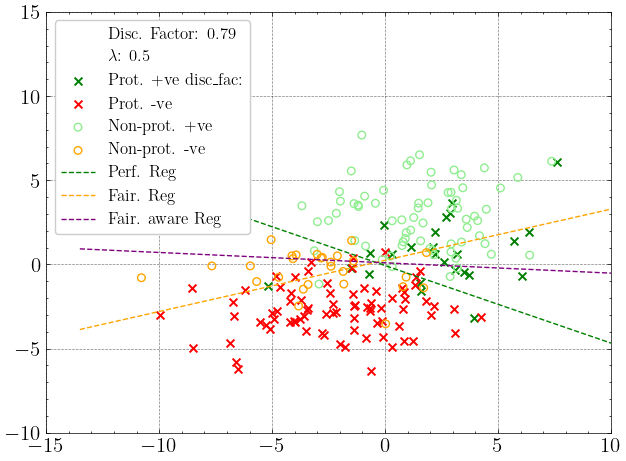

In [2]:
disc_factor = np.pi/4

X, Y, Y_sen = generate_synthetic_data(False, 1000, disc_factor)

p_reg, f_reg = LogisticRegression(), LogisticRegression()
p_reg.fit(X, Y)
f_reg.fit(X, Y_sen)

num_to_draw = 200 # we will only draw a small number of points to avoid clutter
x_draw = X[:num_to_draw]
y_draw = Y[:num_to_draw]
Y_sen_draw = Y_sen[:num_to_draw]

X_s_0 = x_draw[Y_sen_draw == 0.0]
X_s_1 = x_draw[Y_sen_draw == 1.0]
y_s_0 = y_draw[Y_sen_draw == 0.0]
y_s_1 = y_draw[Y_sen_draw == 1.0]


# Create a mesh grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities for each point on the grid
Y_pred_p = p_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Y_pred_p = Y_pred_p.reshape(xx.shape)

Y_pred_f = f_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Y_pred_f = Y_pred_f.reshape(xx.shape)


 
a = 0.5
Y_pred_all = a*Y_pred_p + (1-a)*Y_pred_f
plot_reg( Y_pred_p,Y_pred_f, Y_pred_all, xx, yy, X_s_0, y_s_0, X_s_1, y_s_1, disc_factor, a)
#plt.savefig(f"img/Synth_Data_Zafar{df:.2f}_norm_scale.png")